## 1. Patients

In [90]:
from cfg import *
import os, glob
from util.processor import slide_processor
import cv2 as cv
import matplotlib.pyplot as plt
from util.datagen import generator

In [2]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (8,6)

In [3]:
print(f'데이터 조직 : {ORGAN} 데이터 출처 : {DATA_SOURCE}')
print(f'환자의 수 : {len(ALL_PATIENT_PATHS)}')

데이터 조직 : ['colon'] 데이터 출처 : ['IS']
환자의 수 : 66


환자 level에서는 동일 환자가 multi slide를 갖고 있는 경우가 있어 split을 하지 않고 slide level에서 split을 합니다.<br>
multi slide의 경우 patch dir안에 <b>누적으로 patch를 extract</b> 합니다.<br>
Annotation이 되어 있지 않는 슬라이드의 환자는 따로 분기했지만 annotation slide와 그렇지 않은 slide를 모두 가지고 있는 환자는 분기하지 않았습니다.

In [4]:
for path in ALL_PATIENT_PATHS:
    anno_len = len(glob.glob(path+'*.xml'))
    slide_len = len(glob.glob(path+'*.tiff'))
    if anno_len>=2 and slide_len==anno_len:
        print(f'Multi Slide 환자 : {path} , Slide 갯수 : {slide_len}')
    if anno_len<slide_len:
        print(f'Annotation이 안되어 있는 Slide가 있는 환자 : {path}')
    #else:
        #print(f'단일 Slide 환자 : {path} , Slide 갯수 : {slide_len}')

Multi Slide 환자 : /data/colon/IS/S14-7300/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S17-6609/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S19-12872/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S14-3456/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S17-6850/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S19-17010/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S19-18012/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S19-19150/ , Slide 갯수 : 3
Multi Slide 환자 : /data/colon/IS/S19-17121/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S16-4189/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S14-4626/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S19-11950/ , Slide 갯수 : 2
Multi Slide 환자 : /data/colon/IS/S14-7146/ , Slide 갯수 : 2


## 2. Regions

### Bounding Box (Region)
Slide가 가지고 있는 Region에 대한 분석입니다.

In [5]:
init_param = {
    'level':LEVEL,
    'overlap':OVERLAP,
    'patch_size':PATCH_SIZE,
    'patch_name':PATCH_NAME
}

In [7]:
p1_bboxes = 0; p2_bboxes = 0; p3_bboxes = 0; p4_bboxes = 0;
p1_test_bboxes = 0; p2_test_bboxes = 0; p3_test_bboxes = 0; 
cnt = 0
for slide_path in ALL_SLIDE_PATHS:
    xml_path = '.'.join(slide_path.split('.')[:-1]) + '.xml'
    patient_path = '/'.join(slide_path.split('/')[:-1])
    if os.path.exists(xml_path):
        init_param.update({
            'slide_path':slide_path,
            'xml_path':xml_path,
        })
        slide = slide_processor(init_param)
        anno_dict = slide.get_annotation_dict()
        if 'p3' in anno_dict['bboxes'].keys():
            p3_bboxes += len(anno_dict['bboxes']['p3'])
        if 'p3_test' in anno_dict['bboxes'].keys():
            p3_test_bboxes+= len(anno_dict['bboxes']['p3_test'])
        
        if 'p4' in anno_dict['bboxes'].keys():
            p4_bboxes += len(anno_dict['bboxes']['p4'])
        
        if 'p1' in anno_dict['bboxes'].keys():
            p1_bboxes += len(anno_dict['bboxes']['p1'])
        if 'p1_test' in anno_dict['bboxes'].keys():
            p1_test_bboxes+= len(anno_dict['bboxes']['p1_test'])
        
        if 'p2' in anno_dict['bboxes'].keys():
            p2_bboxes += len(anno_dict['bboxes']['p2'])
        if 'p2_test' in anno_dict['bboxes'].keys():
            p2_test_bboxes+= len(anno_dict['bboxes']['p2_test'])
        
    else:
        continue
    cnt+=1
    if cnt%5==0:
        print(f'{cnt} Doing')

print(f'Tumor Regions : {p1_bboxes}\nNerve Regions : {p2_bboxes}\nPNI Regions : {p3_bboxes}\nNormal Region : {p4_bboxes}' )
print(f'TEST Tumor Regions : {p1_test_bboxes}\nTEST Nerve Regions : {p2_test_bboxes}\nTEST PNI Regions : {p3_test_bboxes}' )


5 Doing
10 Doing
15 Doing
20 Doing
25 Doing
30 Doing
35 Doing
40 Doing
45 Doing
50 Doing
55 Doing
60 Doing
65 Doing
70 Doing
75 Doing
Tumor Regions : 197
Nerve Regions : 194
PNI Regions : 80
Normal Region : 19
TEST Tumor Regions : 10
TEST Nerve Regions : 10
TEST PNI Regions : 20


## 3. Patch Level

- ALL Patches

In [81]:
print('---- NON ONVERLAP ----')
print(f"ALL Tumors : {len(glob.glob('/data/colon/IS/*/patch_100_4_0.0/mask/*p1.png'))}")
print(f"ALL Nerves : {len(glob.glob('/data/colon/IS/*/patch_100_4_0.0/mask/*p2.png'))}")
print(f"ALL Pnis(Nerve) : {len(glob.glob('/data/colon/IS/*/patch_100_4_0.0/mask/*p3.png'))}")
print(f"ALL Normals : {len(glob.glob('/data/colon/IS/*/patch_100_4_0.0/mask/*p4.png'))}")

print('---- ONVERLAP ----')
print(f"ALL Tumors : {len(glob.glob('/data/colon/IS/*/patch_100_2_0.5/mask/*p1.png'))}")
print(f"ALL Nerves : {len(glob.glob('/data/colon/IS/*/patch_100_2_0.5/mask/*p2.png'))}")
print(f"ALL Pnis(Nerve) : {len(glob.glob('/data/colon/IS/*/patch_100_2_0.5/mask/*p3.png'))}")
print(f"ALL Normals : {len(glob.glob('/data/colon/IS/*/patch_100_2_0.5/mask/*p4.png'))}")


---- NON ONVERLAP ----
ALL Tumors : 0
ALL Nerves : 0
ALL Pnis(Nerve) : 0
ALL Normals : 0
---- ONVERLAP ----
ALL Tumors : 7547
ALL Nerves : 687
ALL Pnis(Nerve) : 362
ALL Normals : 880


Augmentation으로 인해 OVERLAP PATCH는 overfitting이 발생할 가능성이 조금 더 큼. (동일한 형태의 pixel을 지니고 있음.)

In [108]:
PATCH_NAME = 'patch_100_2_0.5'

In [125]:
def get_label_list(class_name):
    if class_name=='nerve':
        TRUE_LABEL_LIST = [
            {'label':2,'restrict':0},
            {'label':3,'restrict':0}
        ]
        ZERO_LABEL_LIST = [
            {'label':1,'restrict':5},
            {'label':4,'restrict':10}
        ]
    elif class_name=='tumor':
        TRUE_LABEL_LIST = [
        {'label':1,'restrict':0}
        ]
        ZERO_LABEL_LIST = [
            {'label':2,'restrict':50},
            {'label':3,'restrict':50},
            {'label':4,'restrict':100}
        ]
    else:
        TRUE_LABEL_LIST = [
            {'label':1,'restrict':200},
            {'label':2,'restrict':200},
            {'label':3,'restrict':200},
            {'label':4,'restrict':200}
        ]
        ZERO_LABEL_LIST = []
    return TRUE_LABEL_LIST, ZERO_LABEL_LIST

### NERVE PATCH SET

In [126]:
TRUE_LABEL_LIST, ZERO_LABEL_LIST = get_label_list('nerve')
ALL_ZIP = []
for path in ALL_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        if lbl['restrict']==0:
            ALL_ZIP.extend(target_list) 
        else:
            ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
ALL_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in ALL_ZIP],random_state=311)

TRAIN_ZIP  = ALL_ZIP[:int(0.66*len(ALL_ZIP))]
VALID_ZIP  = ALL_ZIP[int(0.66*len(ALL_ZIP)):int(0.88*len(ALL_ZIP))]
TEST_ZIP  = ALL_ZIP[int(0.88*len(ALL_ZIP)):]
print(f'ALL PATCH : {len(ALL_ZIP)}, TRAIN PATCH : {len(TRAIN_ZIP)}, VALID PATCH : {len(VALID_ZIP)}, TEST PATCH : {len(TEST_ZIP)}')
ZERO_LABELS= [x['label'] for x in ZERO_LABEL_LIST]
print(ZERO_LABELS)

ALL PATCH : 1499, TRAIN PATCH : 989, VALID PATCH : 330, TEST PATCH : 180
[1, 4]


In [127]:
tr = dict(); vl = dict(); te = dict();

for tup in TRAIN_ZIP:
    x = tup[-1][-5]
    if x in tr.keys():
        tr[x] += 1
    else:
        tr[x] = 1
print(f"TRAIN PATCH CLASS\nTUMOR : {tr['1'] } NERVE : {tr['2']} PNI(NERVE) : {tr['3']} NORMAL : {tr['4']}")
for tup in VALID_ZIP:
    x = tup[-1][-5]
    if x in vl.keys():
        vl[x] += 1
    else:
        vl[x] = 1
print(f"VALID PATCH CLASS\nTUMOR : {vl['1'] } NERVE : {vl['2']} PNI(NERVE) : {vl['3']} NORMAL : {vl['4']}")
for tup in TEST_ZIP:
    x = tup[-1][-5]
    if x in te.keys():
        te[x] += 1
    else:
        te[x] = 1
print(f"TEST PATCH CLASS\nTUMOR : {te['1'] } NERVE : {te['2']} PNI(NERVE) : {te['3']} NORMAL : {te['4']}")

TRAIN PATCH CLASS
TUMOR : 258 NERVE : 445 PNI(NERVE) : 241 NORMAL : 45
VALID PATCH CLASS
TUMOR : 79 NERVE : 153 PNI(NERVE) : 81 NORMAL : 17
TEST PATCH CLASS
TUMOR : 43 NERVE : 89 PNI(NERVE) : 40 NORMAL : 8


- NERVE DATAGEN

In [116]:
train_gen = generator(TRAIN_ZIP,32,ZERO_LABELS,is_train=True,binary=True)
it = iter(train_gen)
## GET PIXEL WEIGHT
import numpy as np
from sklearn.utils import compute_class_weight
ones = 0; zeros = 0
for i in range(5):
    batch_set = next(it)
    img_batch, msk_batch = batch_set
    ones+=np.sum(msk_batch==1)
    zeros+=np.sum(msk_batch==0)
print(ones,zeros)
labels = [0]*zeros + [1]*ones
cw = compute_class_weight(
    class_weight='balanced',
    classes = np.unique(labels),
    y = labels
)
print(f'Log Class Weight : {np.log1p(cw)}')

3915280 38027760
Log Class Weight : [0.43920882 1.8494507 ]


### TUMOR PATCH SET

In [119]:
TRUE_LABEL_LIST, ZERO_LABEL_LIST = get_label_list('tumor')
ALL_ZIP = []
for path in ALL_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        if lbl['restrict']==0:
            ALL_ZIP.extend(target_list) 
        else:
            ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
ALL_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in ALL_ZIP],random_state=311)

TRAIN_ZIP  = ALL_ZIP[:int(0.66*len(ALL_ZIP))]
VALID_ZIP  = ALL_ZIP[int(0.66*len(ALL_ZIP)):int(0.88*len(ALL_ZIP))]
TEST_ZIP  = ALL_ZIP[int(0.88*len(ALL_ZIP)):]
print(f'ALL PATCH : {len(ALL_ZIP)}, TRAIN PATCH : {len(TRAIN_ZIP)}, VALID PATCH : {len(VALID_ZIP)}, TEST PATCH : {len(TEST_ZIP)}')
ZERO_LABELS= [x['label'] for x in ZERO_LABEL_LIST]
print(ZERO_LABELS)

ALL PATCH : 9156, TRAIN PATCH : 6042, VALID PATCH : 2015, TEST PATCH : 1099
[2, 3, 4]


In [120]:
tr = dict(); vl = dict(); te = dict();

for tup in TRAIN_ZIP:
    x = tup[-1][-5]
    if x in tr.keys():
        tr[x] += 1
    else:
        tr[x] = 1
print(f"TRAIN PATCH CLASS\nTUMOR : {tr['1'] } NERVE : {tr['2']} PNI(NERVE) : {tr['3']} NORMAL : {tr['4']}")
for tup in VALID_ZIP:
    x = tup[-1][-5]
    if x in vl.keys():
        vl[x] += 1
    else:
        vl[x] = 1
print(f"VALID PATCH CLASS\nTUMOR : {vl['1'] } NERVE : {vl['2']} PNI(NERVE) : {vl['3']} NORMAL : {vl['4']}")
for tup in TEST_ZIP:
    x = tup[-1][-5]
    if x in te.keys():
        te[x] += 1
    else:
        te[x] = 1
print(f"TEST PATCH CLASS\nTUMOR : {te['1'] } NERVE : {te['2']} PNI(NERVE) : {te['3']} NORMAL : {te['4']}")

TRAIN PATCH CLASS
TUMOR : 4996 NERVE : 457 PNI(NERVE) : 230 NORMAL : 359
VALID PATCH CLASS
TUMOR : 1644 NERVE : 148 PNI(NERVE) : 98 NORMAL : 125
TEST PATCH CLASS
TUMOR : 907 NERVE : 82 PNI(NERVE) : 34 NORMAL : 76


- TUMOR CLASS WEIGHT

In [121]:
train_gen = generator(TRAIN_ZIP,32,ZERO_LABELS,is_train=True,binary=True)
it = iter(train_gen)
## GET PIXEL WEIGHT
import numpy as np
from sklearn.utils import compute_class_weight
ones = 0; zeros = 0
for i in range(5):
    batch_set = next(it)
    img_batch, msk_batch = batch_set
    ones+=np.sum(msk_batch==1)
    zeros+=np.sum(msk_batch==0)
print(ones,zeros)
labels = [0]*zeros + [1]*ones
cw = compute_class_weight(
    class_weight='balanced',
    classes = np.unique(labels),
    y = labels
)
print(f'Log Class Weight : {np.log1p(cw)}')

11719345 30223695
Log Class Weight : [0.52701985 1.02585479]


### MULTICLASS PATCH SET

In [122]:
TRUE_LABEL_LIST, ZERO_LABEL_LIST = get_label_list('multi')
ALL_ZIP = []
for path in ALL_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        if lbl['restrict']==0:
            ALL_ZIP.extend(target_list) 
        else:
            ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        ALL_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
ALL_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in ALL_ZIP],random_state=311)

TRAIN_ZIP  = ALL_ZIP[:int(0.66*len(ALL_ZIP))]
VALID_ZIP  = ALL_ZIP[int(0.66*len(ALL_ZIP)):int(0.88*len(ALL_ZIP))]
TEST_ZIP  = ALL_ZIP[int(0.88*len(ALL_ZIP)):]
print(f'ALL PATCH : {len(ALL_ZIP)}, TRAIN PATCH : {len(TRAIN_ZIP)}, VALID PATCH : {len(VALID_ZIP)}, TEST PATCH : {len(TEST_ZIP)}')
ZERO_LABELS= [x['label'] for x in ZERO_LABEL_LIST]
print(ZERO_LABELS)

ALL PATCH : 9255, TRAIN PATCH : 6108, VALID PATCH : 2036, TEST PATCH : 1111
[]


In [123]:
tr = dict(); vl = dict(); te = dict();

for tup in TRAIN_ZIP:
    x = tup[-1][-5]
    if x in tr.keys():
        tr[x] += 1
    else:
        tr[x] = 1
print(f"TRAIN PATCH CLASS\nTUMOR : {tr['1'] } NERVE : {tr['2']} PNI(NERVE) : {tr['3']} NORMAL : {tr['4']}")
for tup in VALID_ZIP:
    x = tup[-1][-5]
    if x in vl.keys():
        vl[x] += 1
    else:
        vl[x] = 1
print(f"VALID PATCH CLASS\nTUMOR : {vl['1'] } NERVE : {vl['2']} PNI(NERVE) : {vl['3']} NORMAL : {vl['4']}")
for tup in TEST_ZIP:
    x = tup[-1][-5]
    if x in te.keys():
        te[x] += 1
    else:
        te[x] = 1
print(f"TEST PATCH CLASS\nTUMOR : {te['1'] } NERVE : {te['2']} PNI(NERVE) : {te['3']} NORMAL : {te['4']}")

TRAIN PATCH CLASS
TUMOR : 4842 NERVE : 462 PNI(NERVE) : 239 NORMAL : 565
VALID PATCH CLASS
TUMOR : 1614 NERVE : 149 PNI(NERVE) : 86 NORMAL : 187
TEST PATCH CLASS
TUMOR : 880 NERVE : 76 PNI(NERVE) : 37 NORMAL : 118


In [124]:
train_gen = generator(TRAIN_ZIP,32,ZERO_LABELS,is_train=True,binary=False)
it = iter(train_gen)
## GET PIXEL WEIGHT
import numpy as np
from sklearn.utils import compute_class_weight
ones = 0; zeros = 0; twos = 0
for i in range(5):
    batch_set = next(it)
    img_batch, msk_batch = batch_set
    ones+=np.sum(msk_batch[...,1]==1)
    twos+=np.sum(msk_batch[...,2]==1)
    zeros+=np.sum(msk_batch[...,0]==1)
print(ones,zeros)
labels = [0]*zeros + [1]*ones + [2]*twos
cw = compute_class_weight(
    class_weight='balanced',
    classes = np.unique(labels),
    y = labels
)
print(f'Log Class Weight : {np.log1p(cw)}')

12443605 25197200
Log Class Weight : [0.40966507 0.70568794 3.05301964]


주어진 Slide들을 학습하여 새로운 Slide를 예측하는 것을 목표로 Split한 Slide를 유지하여 Patch를 추출했습니다.<br>
패치는 100x 패치입니다.

### 1) Nerve

nerve patch는 pni의 nerve와 nerve class 의 nerve를 true class로 잡았습니다.

#### ISH

In [28]:
CLASS_NAME = 'nerve'
if CLASS_NAME=='nerve':
    TRUE_LABEL_LIST = [
        {'label':2,'restrict':0},
        {'label':3,'restrict':0}
    ]
    ZERO_LABEL_LIST = [
        {'label':1,'restrict':10},
        {'label':4,'restrict':20}
    ]
elif CLASS_NAME=='tumor':
    TRUE_LABEL_LIST = [
    {'label':1,'restrict':0}
    ]
    ZERO_LABEL_LIST = [
        {'label':2,'restrict':50},
        {'label':3,'restrict':50},
        {'label':4,'restrict':100}
    ]
else:
    TRUE_LABEL_LIST = [
        {'label':1,'restrict':50},
        {'label':2,'restrict':100},
        {'label':3,'restrict':100},
        {'label':4,'restrict':100}
    ]
    ZERO_LABEL_LIST = []

In [33]:
PATCH_NAME = 'patch_100_4'

In [34]:

TRAIN_ZIP = []
for path in TRAIN_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        if lbl['restrict']==0:
            TRAIN_ZIP.extend(target_list) 
        else:
            TRAIN_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        TRAIN_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TRAIN_ZIP],random_state=311)

VALID_ZIP = []
for path in VALID_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        VALID_ZIP.extend(target_list) 
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        VALID_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in VALID_ZIP],random_state=311)

TEST_ZIP = []
for path in TEST_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('.svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        TEST_ZIP.extend(target_list) 
    
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        TEST_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
        
TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TEST_ZIP],random_state=311)

In [35]:
tr_1 = 0; tr_2 = 0; tr_3 = 0 ; tr_4 = 0
vl_1 = 0; vl_2 = 0; vl_3 = 0 ; vl_4 = 0
te_1 = 0; te_2 = 0; te_3 = 0 ; te_4 = 0

for tup in TRAIN_ZIP:
    x = tup[-1][-5]
    if x=='1':
        tr_1+=1
    elif x=='2':
        tr_2+=1
    elif x=='3':
        tr_3+=1
    else:
        tr_4+=1
print(f'TRAIN PATCH CLASS\nNERVE : {tr_2 + tr_3} NOT_NERVE : {tr_1+tr_4} (TUMOR : {tr_1} NORMAL : {tr_4})')
for tup in VALID_ZIP:
    x = tup[-1][-5]
    if x=='1':
        vl_1+=1
    elif x=='2':
        vl_2+=1
    elif x=='3':
        vl_3+=1
    else:
        vl_4+=1
print(f'VALID PATCH CLASS\nNERVE : {vl_2 + vl_3} NOT_NERVE : {vl_1+vl_4} (TUMOR : {vl_1} NORMAL : {vl_4})')
for tup in TEST_ZIP:
    x = tup[-1][-5]
    if x=='1':
        te_1+=1
    elif x=='2':
        te_2+=1
    elif x=='3':
        te_3+=1
    else:
        te_4+=1
print(f'TEST PATCH CLASS\nNERVE : {te_2 + te_3} NOT_NERVE : {te_1+te_4} (TUMOR : {te_1} NORMAL : {te_4})')

TRAIN PATCH CLASS
NERVE : 152 NOT_NERVE : 455 (TUMOR : 455 NORMAL : 0)
VALID PATCH CLASS
NERVE : 43 NOT_NERVE : 170 (TUMOR : 170 NORMAL : 0)
TEST PATCH CLASS
NERVE : 57 NOT_NERVE : 132 (TUMOR : 132 NORMAL : 0)


In [36]:
print(f'Nerve 패치 총 갯수 : {len(TRAIN_ZIP) + len(VALID_ZIP) + len(TEST_ZIP)}')
print(f'Train Length : {len(TRAIN_ZIP)} Valid Length : {len(VALID_ZIP)} Test Length : {len(TEST_ZIP)}')

Nerve 패치 총 갯수 : 1009
Train Length : 607 Valid Length : 213 Test Length : 189


## Tumor

In [33]:
CLASS_NAME = 'tumor'
PATCH_NAME = 'patch_100_5'
if CLASS_NAME=='nerve':
    TRUE_LABEL_LIST = [
        {'label':2,'restrict':0},
        {'label':3,'restrict':0}
    ]
    ZERO_LABEL_LIST = [
        {'label':1,'restrict':10},
        {'label':4,'restrict':20}
    ]
elif CLASS_NAME=='tumor':
    TRUE_LABEL_LIST = [
    {'label':1,'restrict':0}
    ]
    ZERO_LABEL_LIST = [
        {'label':2,'restrict':50},
        {'label':3,'restrict':50},
        {'label':4,'restrict':100}
    ]
else:
    TRUE_LABEL_LIST = [
        {'label':1,'restrict':50},
        {'label':2,'restrict':100},
        {'label':3,'restrict':100},
        {'label':4,'restrict':100}
    ]
    ZERO_LABEL_LIST = []
TRAIN_ZIP = []
for path in TRAIN_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])

TRAIN_ZIP = []        

for path in TRAIN_SLIDE_PATHS:
    slide_name = path.split('/')[-1].replace('.tiff','').replace('svs','')
    patient_path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        #print(len(target_list))
        if lbl['restrict']==0:
            TRAIN_ZIP.extend(target_list)
        else:
            TRAIN_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
    for lbl in ZERO_LABEL_LIST :
        target_list = glob.glob(patient_path+f'{PATCH_NAME}/mask/{slide_name}*_p{lbl["label"]}.png')
        TRAIN_ZIP.extend(shuffle(target_list,random_state = 311)[:lbl["restrict"]])
        
TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TRAIN_ZIP],random_state=311)
VALID_ZIP = []
for path in VALID_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in VALID_ZIP],random_state=311)
TEST_ZIP = []
for path in TEST_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TEST_ZIP],random_state=311)

print(f'Tumor 패치 총 갯수 : {len(TRAIN_ZIP) + len(VALID_ZIP) + len(TEST_ZIP)}')
print(f'Train Length : {len(TRAIN_ZIP)} Valid Length : {len(VALID_ZIP)} Test Length : {len(TEST_ZIP)}')

tr_1 = 0; tr_2 = 0; tr_3 = 0 ; tr_4 = 0
vl_1 = 0; vl_2 = 0; vl_3 = 0 ; vl_4 = 0
te_1 = 0; te_2 = 0; te_3 = 0 ; te_4 = 0

for tup in TRAIN_ZIP:
    x = tup[-1][-5]
    if x=='1':
        tr_1+=1
    elif x=='2':
        tr_2+=1
    elif x=='3':
        tr_3+=1
    else:
        tr_4+=1
print(f'TRAIN PATCH CLASS\nTUMOR : {tr_1 } NOT_TUMOR : {tr_3+tr_4+tr_2} (NERVE : {tr_2+tr_3} NORMAL : {tr_4})')
for tup in VALID_ZIP:
    x = tup[-1][-5]
    if x=='1':
        vl_1+=1
    elif x=='2':
        vl_2+=1
    elif x=='3':
        vl_3+=1
    else:
        vl_4+=1
print(f'VALID PATCH CLASS\nTUMOR : {vl_1 } NOT_TUMOR : {vl_2+vl_4+ vl_3} (NERVE : {vl_2+vl_3} NORMAL : {vl_4})')
for tup in TEST_ZIP:
    x = tup[-1][-5]
    if x=='1':
        te_1+=1
    elif x=='2':
        te_2+=1
    elif x=='3':
        te_3+=1
    else:
        te_4+=1
print(f'TEST PATCH CLASS\nTUMOR : {te_1 } NOT_TUMOR : {te_2+te_4+ te_3} (NERVE : {te_2+te_3} NORMAL : {te_4})')

Tumor 패치 총 갯수 : 13233
Train Length : 7553 Valid Length : 2474 Test Length : 3206
TRAIN PATCH CLASS
TUMOR : 6485 NOT_TUMOR : 1068 (NERVE : 608 NORMAL : 460)
VALID PATCH CLASS
TUMOR : 2218 NOT_TUMOR : 256 (NERVE : 256 NORMAL : 0)
TEST PATCH CLASS
TUMOR : 2702 NOT_TUMOR : 504 (NERVE : 404 NORMAL : 100)


#### PAIP

In [19]:
PAIP_PATCH_NAME = 'patches'
PAIP_TRUE_LABEL_LIST = [
    {'label':2,'restrict':0},
    {'label':3,'restrict':0}
]
PAIP_ZERO_LABEL_LIST = [
    {'label':3,'restrict':30},
    {'label':4,'restrict':5}
]


PAIP_ALL_SLIDE_PATHS = []; [PAIP_ALL_SLIDE_PATHS.extend(glob.glob(path+'*.svs')) for path in ALL_PATIENT_PATHS]
PAIP_TRAIN_SLIDE_PATHS = shuffle(PAIP_ALL_SLIDE_PATHS,random_state = 311)[:int(DATA_SPLIT[0]*len(PAIP_ALL_SLIDE_PATHS))]
PAIP_VALID_SLIDE_PATHS = shuffle(PAIP_ALL_SLIDE_PATHS,random_state=311)[int(DATA_SPLIT[0]*len(PAIP_ALL_SLIDE_PATHS)):-int(DATA_SPLIT[2]*len(PAIP_ALL_SLIDE_PATHS))]
PAIP_TEST_SLIDE_PATHS = shuffle(PAIP_ALL_SLIDE_PATHS,random_state=311)[-int(DATA_SPLIT[2]*len(PAIP_ALL_SLIDE_PATHS)):]

PAIP_TRAIN_ZIP = []
for path in PAIP_TRAIN_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in PAIP_TRUE_LABEL_LIST :PAIP_TRAIN_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in PAIP_ZERO_LABEL_LIST :PAIP_TRAIN_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
PAIP_TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in PAIP_TRAIN_ZIP],random_state=311)
PAIP_VALID_ZIP = []
for path in PAIP_VALID_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in PAIP_TRUE_LABEL_LIST :PAIP_VALID_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in PAIP_ZERO_LABEL_LIST :PAIP_VALID_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
PAIP_VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in PAIP_VALID_ZIP],random_state=311)
PAIP_TEST_ZIP = []
for path in PAIP_TEST_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in PAIP_TRUE_LABEL_LIST :PAIP_TEST_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in PAIP_ZERO_LABEL_LIST :PAIP_TEST_ZIP.extend(glob.glob(path+f'{PAIP_PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
PAIP_TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in PAIP_TEST_ZIP],random_state=311)

In [20]:
print(f'Nerve 패치 총 갯수 : {len(PAIP_TRAIN_ZIP) + len(PAIP_VALID_ZIP) + len(PAIP_TEST_ZIP)}')
print(f'Train Length : {len(PAIP_TRAIN_ZIP)} Valid Length : {len(PAIP_VALID_ZIP)} Test Length : {len(PAIP_TEST_ZIP)}')

Nerve 패치 총 갯수 : 11428
Train Length : 7785 Valid Length : 1886 Test Length : 1757


#### Visualize Patch

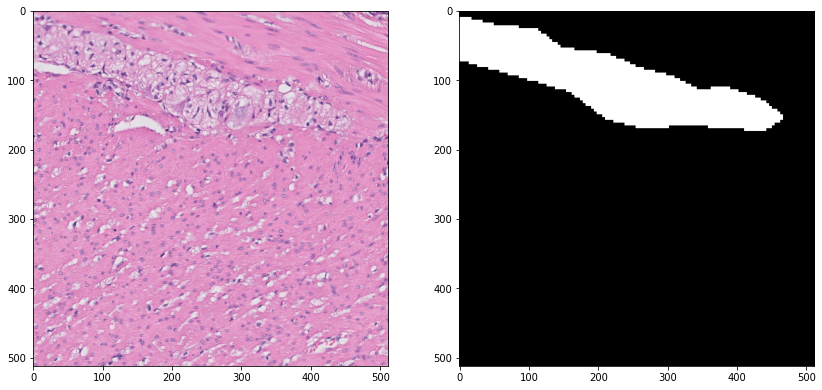

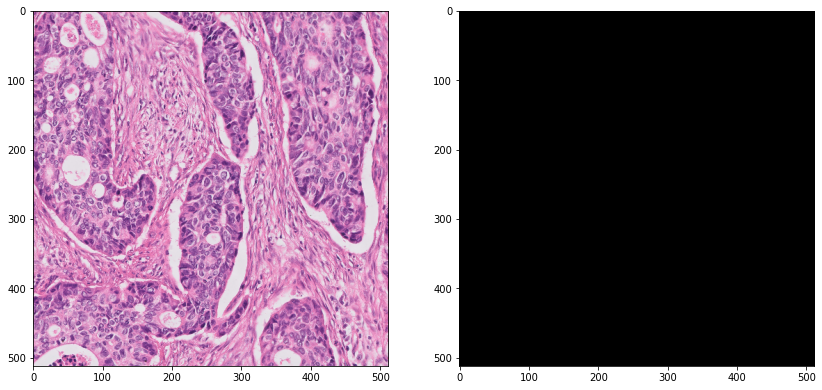

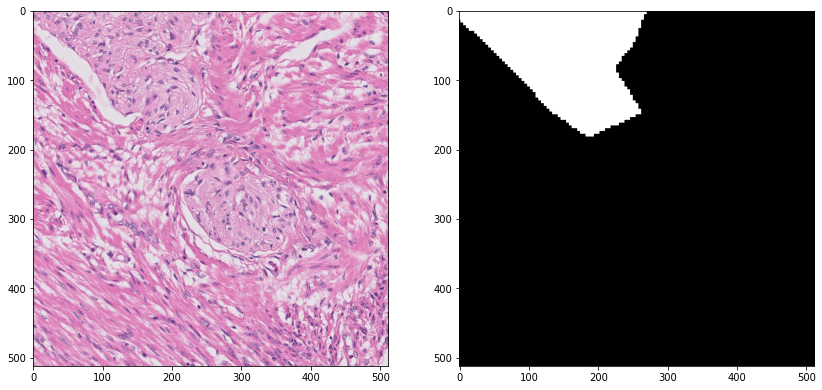

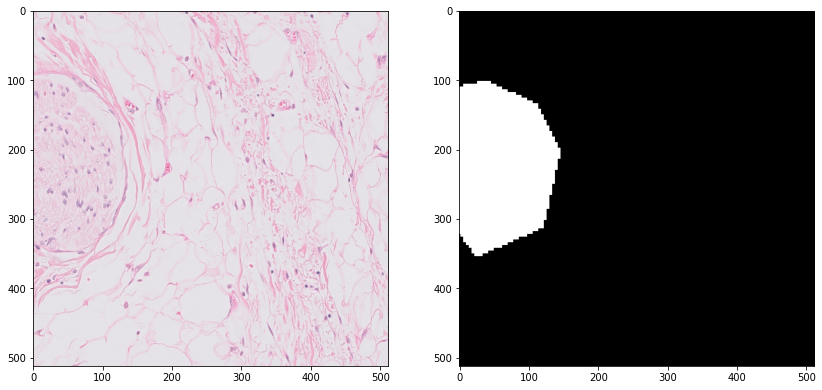

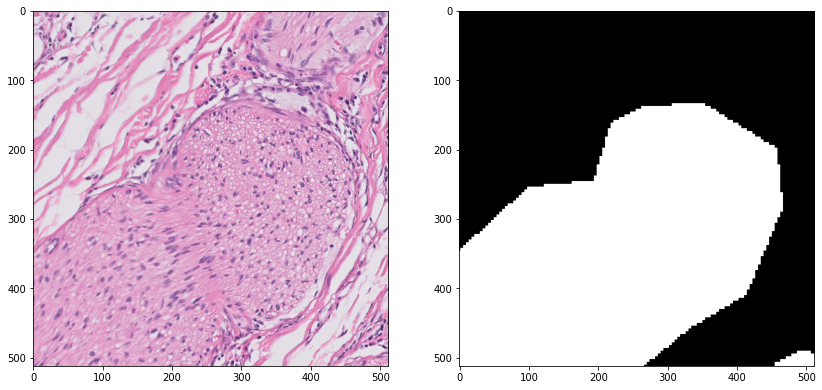

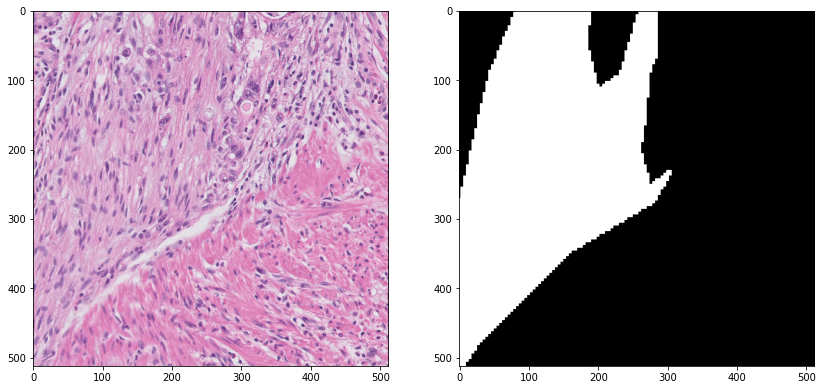

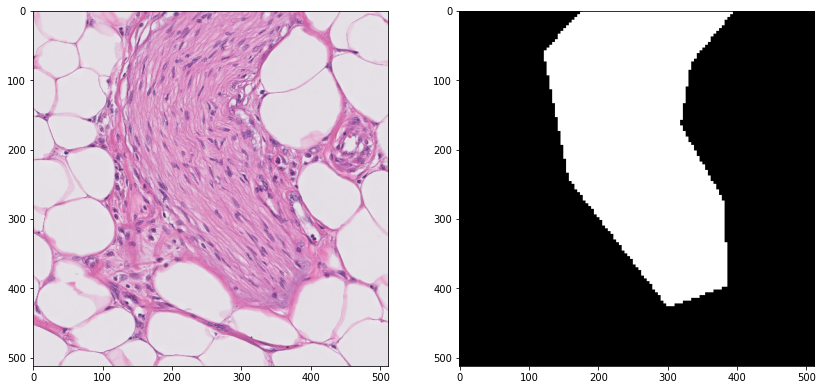

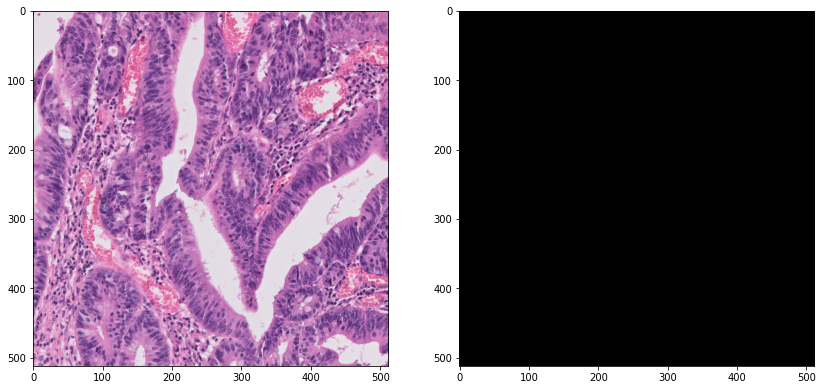

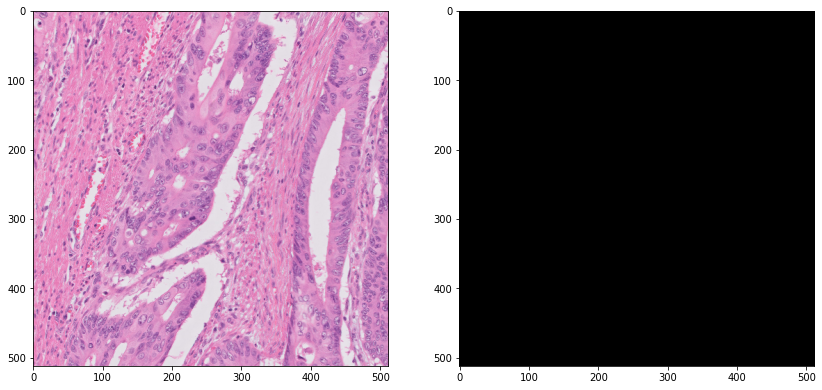

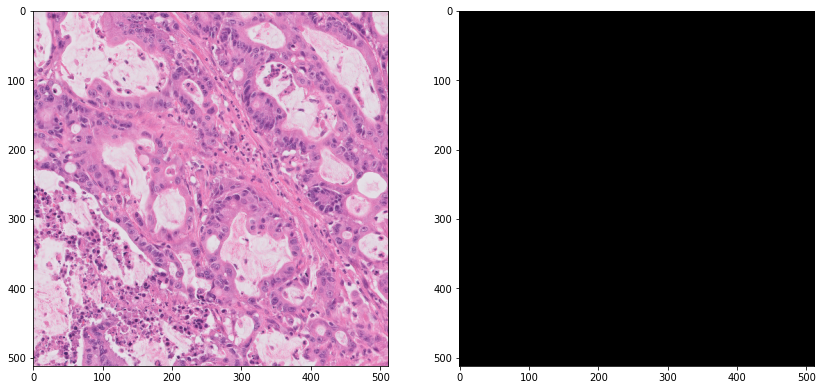

In [78]:
import numpy as np
for img_path,mask_path in TRAIN_ZIP[:10]:
    img = cv.imread(img_path); mask = cv.imread(mask_path,0)
    plt.figure(figsize = (14,10))
    plt.subplot(1,2,1); plt.imshow(img)
    if mask_path[-5]=='1' or mask_path[-5]=='4':
        plt.subplot(1,2,2); plt.imshow(np.zeros_like(img),vmin=0,vmax=1)
    else:
        plt.subplot(1,2,2); plt.imshow(mask,vmin=0,vmax=1)

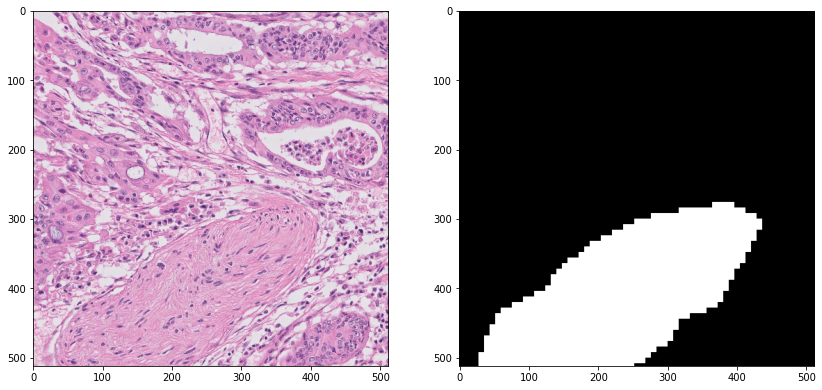

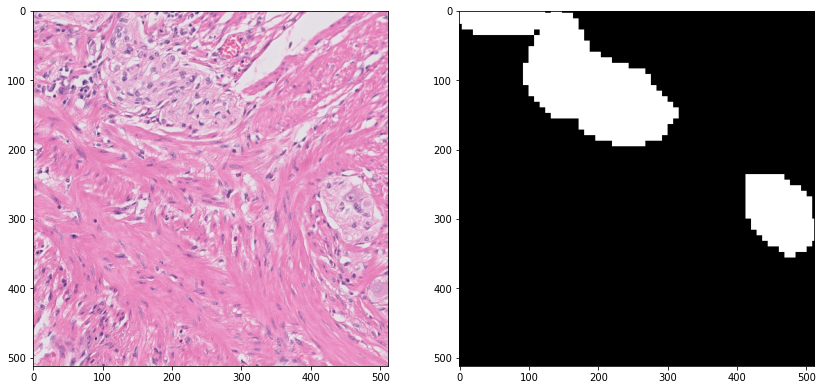

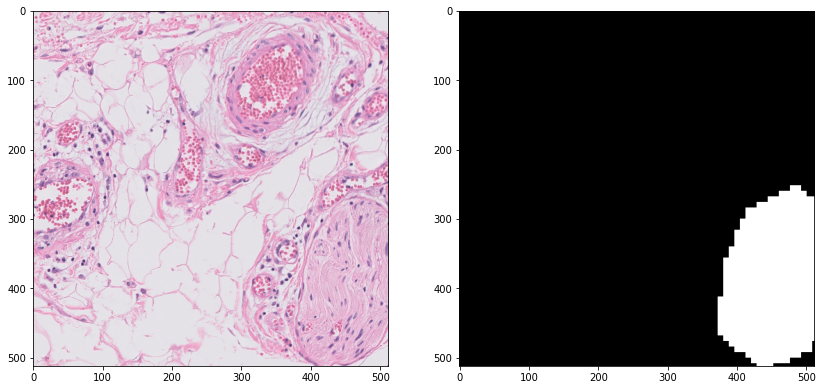

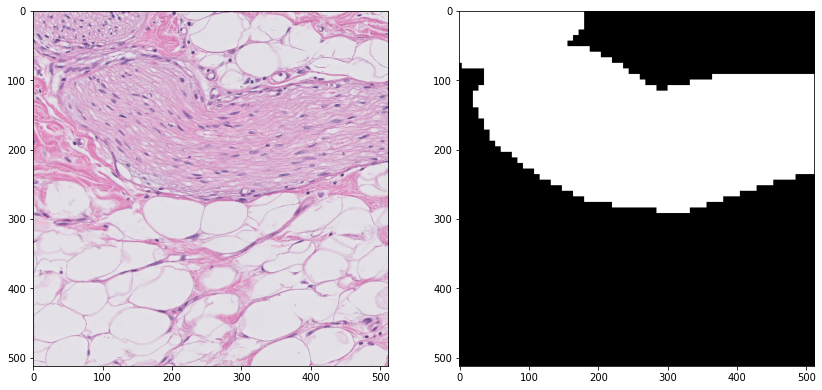

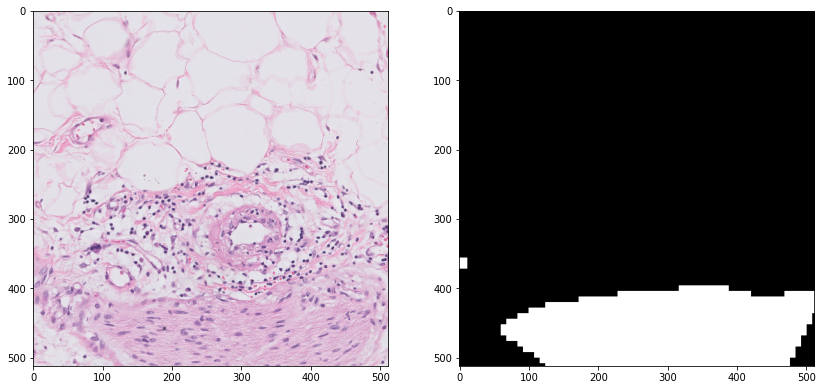

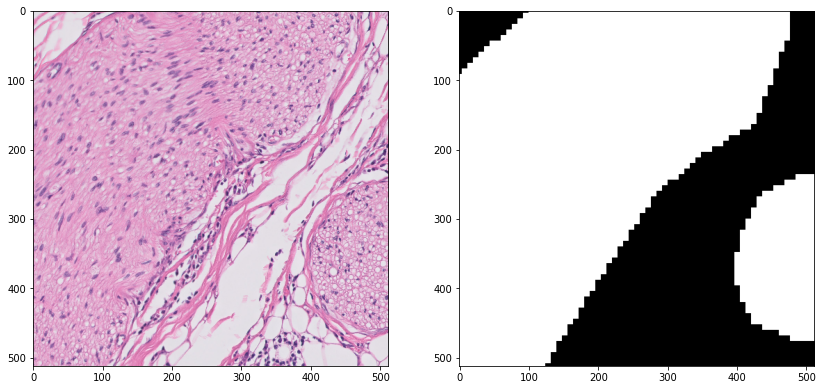

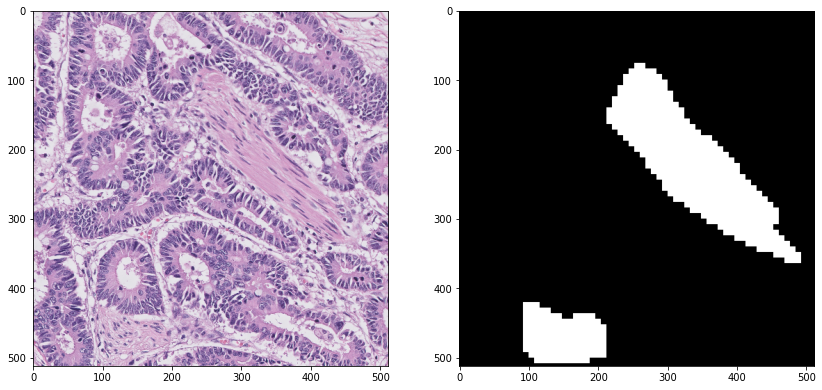

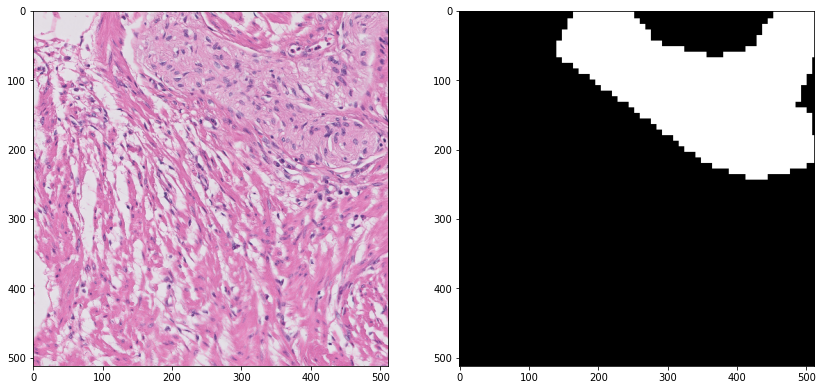

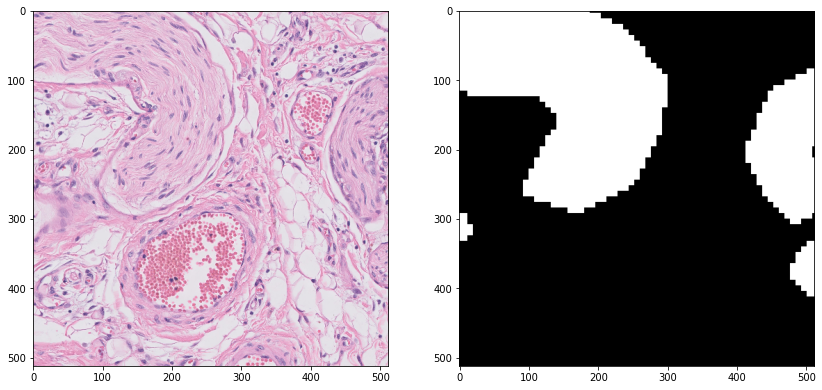

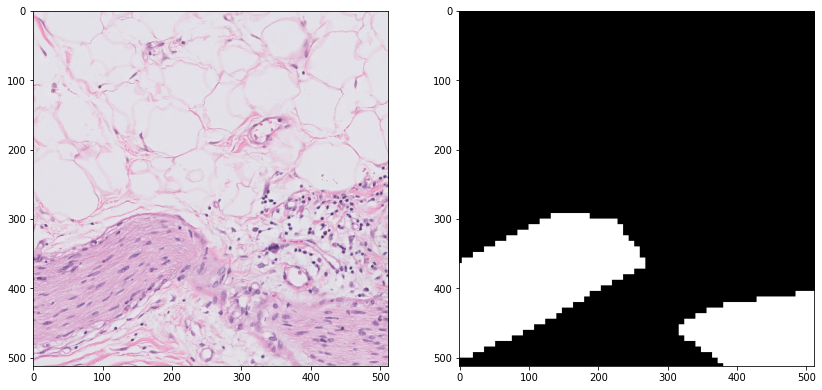

In [68]:
color = ('r','g','b')
for img_path,mask_path in TRAIN_ZIP[:10]:
    img = cv.imread(img_path); mask = cv.imread(mask_path,0)
    plt.figure(figsize = (14,10))
    plt.subplot(1,2,1); plt.imshow(img)
    plt.subplot(1,2,2); plt.imshow(mask)
    

In [ ]:
import numpy as np
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)

for image_path,_ in TRAIN_ZIP[:30]:    
    x = cv.imread(image_path)
    x = x.transpose(2,0,1)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure(figsize = (16,12))
plt.subplot(3,1,1)
#plt.hist(count_r, bins=30, color='r', alpha=0.33)
plt.bar(bins[:-1], count_r, color='r', alpha=0.33)
plt.subplot(3,1,2)
plt.bar(bins[:-1], count_g, color='g', alpha=0.33)
plt.subplot(3,1,3)
plt.bar(bins[:-1], count_b, color='b', alpha=0.33)

In [ ]:
## ISH NERVE
TRUE_LABEL_LIST = [
    {'label':2,'restrict':0},
    {'label':3,'restrict':0}
]
ZERO_LABEL_LIST = []
TRAIN_ZIP = []
for path in TRAIN_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TRAIN_ZIP],random_state=311)
VALID_ZIP = []
for path in VALID_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in VALID_ZIP],random_state=311)
TEST_ZIP = []
for path in TEST_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TEST_ZIP],random_state=311)

In [ ]:
## PAIP NERVE
paip_slide_paths = []; [paip_slide_paths.extend(glob.glob(path+'*.svs')) for path in ALL_PATIENT_PATHS]
TRAIN_SLIDE_PATHS = shuffle(ALL_SLIDE_PATHS,random_state = 311)[:int(DATA_SPLIT[0]*len(ALL_SLIDE_PATHS))]
VALID_SLIDE_PATHS = shuffle(ALL_SLIDE_PATHS,random_state=311)[int(DATA_SPLIT[0]*len(ALL_SLIDE_PATHS)):-int(DATA_SPLIT[2]*len(ALL_SLIDE_PATHS))]
TEST_SLIDE_PATHS = shuffle(ALL_SLIDE_PATHS,random_state=311)[-int(DATA_SPLIT[2]*len(ALL_SLIDE_PATHS)):]

TRUE_LABEL_LIST = [
    {'label':2,'restrict':0},
    {'label':3,'restrict':0}
]
ZERO_LABEL_LIST = []
TRAIN_PAIP_ZIP = []
for path in TRAIN_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TRAIN_ZIP],random_state=311)
VALID_ZIP = []
for path in VALID_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in VALID_ZIP],random_state=311)
TEST_ZIP = []
for path in TEST_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TEST_ZIP],random_state=311)

In [54]:
samples = 500
ish_hist_r = 0; ish_hist_g = 0; ish_hist_b = 0
paip_hist_r = 0; paip_hist_g = 0; paip_hist_b = 0
for i in range(samples):
    ish_img_path , _  = TRAIN_ZIP[i]
    paip_img_path, _  = PAIP_TRAIN_ZIP[i]
    ish_img = cv.imread(ish_img_path)
    paip_img = cv.imread(paip_img_path)
    ish_r = cv.calcHist([ish_img],[0],None,[256],[0,256])
    ish_g = cv.calcHist([ish_img],[1],None,[256],[0,256])
    ish_b = cv.calcHist([ish_img],[2],None,[256],[0,256])
    paip_r = cv.calcHist([paip_img],[0],None,[256],[0,256])
    paip_g = cv.calcHist([paip_img],[1],None,[256],[0,256])
    paip_b = cv.calcHist([paip_img],[2],None,[256],[0,256])
    ish_hist_r += ish_r
    ish_hist_g += ish_g
    ish_hist_b += ish_b
    paip_hist_r += paip_r
    paip_hist_g += paip_g
    paip_hist_b += paip_b
    
ish_hist_r/=samples
ish_hist_g/=samples
ish_hist_b/=samples
paip_hist_r/=samples
paip_hist_g/=samples
paip_hist_b/=samples

    

Text(0.5, 0.98, 'RGB in NERVE : 500')

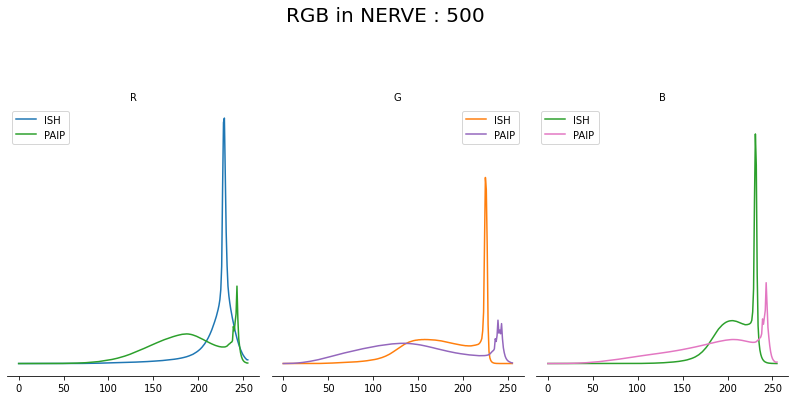

In [71]:
fig,axes = plt.subplots(ncols=3, nrows=1, figsize=(14,6), # 행 수, 열 수 지정, 크기 지정
                         gridspec_kw={"wspace":0.05, "hspace":0.1}, # subplots 사이 간격 지정
                         sharex=True, sharey=True)

colors = ['R','G','B']
hist_ish = [ish_hist_r,ish_hist_g,ish_hist_b]
hist_paip = [paip_hist_r,paip_hist_g,paip_hist_b]
axes = axes.ravel()

for i,(ax,hist) in enumerate(zip(axes,hist_ish)) :
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(hist,color = f'C{i}',label = 'ISH')
    ax.plot(hist_paip[i],color = f'C{2*(i+1)}',label = 'PAIP')
    ax.set_yticks([])
    ax.set_title(colors[i],fontsize = 10)
    ax.legend()
    

fig.subplots_adjust(top=0.75)
fig.suptitle(f'RGB in NERVE : {samples}',fontsize = 20)


### 2) Tumor

In [ ]:
import numpy as np
for img_path,mask_path in TRAIN_ZIP[:10]:
    img = cv.imread(img_path); mask = cv.imread(mask_path,0)
    plt.figure(figsize = (14,10))
    plt.subplot(1,2,1); plt.imshow(img)
    if mask_path[-5]=='1' or mask_path[-5]=='4':
        plt.subplot(1,2,2); plt.imshow(np.zeros_like(img),vmin=0,vmax=1)
    else:
        plt.subplot(1,2,2); plt.imshow(mask,vmin=0,vmax=1)

In [ ]:
for img_path,mask_path in TRAIN_ZIP[:10]:
    img = cv.imread(img_path); mask = cv.imread(mask_path,0)
    plt.figure(figsize = (14,10))
    plt.subplot(1,2,1); plt.imshow(img)
    plt.subplot(1,2,2); plt.imshow(mask,vmin=0,vmax=1)

Tumor의 경우 Annotation이 영역에 대한 Annotation의 경향이 있어 magnification을 50x로 하여 fov를 넓혀서 확인할 예정입니다.

### 50x

In [ ]:
TRUE_LABEL_LIST = [
    {'label':1,'restrict':0}, # tumor
]
PATCH_NAME='patch50'
TRAIN_ZIP = []
for path in TRAIN_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TRAIN_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TRAIN_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TRAIN_ZIP],random_state=311)
VALID_ZIP = []
for path in VALID_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :VALID_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
VALID_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in VALID_ZIP],random_state=311)
TEST_ZIP = []
for path in TEST_SLIDE_PATHS:
    path = '/'.join(path.split('/')[:-1]) + '/'
    for lbl in TRUE_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')) 
    for lbl in ZERO_LABEL_LIST :TEST_ZIP.extend(glob.glob(path+f'{PATCH_NAME}/mask/*_p{lbl["label"]}.png')[:lbl["restrict"]])
TEST_ZIP = shuffle([('/'.join(x.split('/')[:-2])+'/image/'+re.sub('_p[0-9]','',x.split('/')[-1]),x) for x in TEST_ZIP],random_state=311)

In [ ]:
for img_path,mask_path in TRAIN_ZIP[:10]:
    img = cv.imread(img_path); mask = cv.imread(mask_path,0)
    plt.figure(figsize = (14,10))
    plt.subplot(1,2,1); plt.imshow(img)
    plt.subplot(1,2,2); plt.imshow(mask,vmin=0,vmax=1)